In [1]:
from data.argparser import args_parsing
from datetime import datetime
from optuna_objectives import XGB_Optuna
from optuna.visualization import plot_pareto_front
from optuna.visualization import plot_contour
from optuna.visualization import plot_edf
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_parallel_coordinate
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_slice


now = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")

args = args_parsing()
args.loss = "linlin"

c:\Users\cle\AppData\Local\miniforge3\envs\test\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Args in experiment:
Namespace(data='SRL_NEG_00_04', model='xgboost', loss='rmse', w_rmse_weight=5, linex_weight=0.05, linlin_weight=0.1, input_len=30, target_len=1, timestamp='19-07-2023_16-40-56', root_path='data\\processed\\SRL', data_path='SRL_NEG_00_04.csv', features='S', cols=None, scale='standard', target='capacity_price', freq='d', n_estimators=100, max_depth=3, min_child_weight=1.0, learning_rate=0.1, subsample=1.0, colsample_bytree=1.0, reg_gamma=0.0, reg_alpha=0.0, tune_num_samples=5)



In [2]:
search_space = dict(
    linex_weight=[0.001, 1, 0.01],
    w_rmse_weight=[1.0, 10.0, 0.1],
    linlin_weight=[0.01, 0.25, 0.001],
    
    n_estimators=[50, 150],
    min_child_weight=[5, 15],
    max_depth=[3, 12],
    
    learning_rate=[0.05, 0.5],
    gamma=[0, 1],
    subsample=[0.4, 1.0, 0.05],
    colsample_bytree=[0.2, 1.0, 0.05],
    
    reg_alpha=[1e-5, 1.0],
    reg_lambda=[1e-5, 1.0],
    )

In [3]:
s = XGB_Optuna(args=args, search_space=search_space, timestamp=now, n_trials=100)

[I 2023-07-19 16:40:57,544] A new study created in RDB with name: tune_xgboost_SRL_NEG_00_04_linlin_19-07-2023_16-40-56
[I 2023-07-19 16:40:58,295] Trial 0 finished with value: 18.23 and parameters: {'colsample_bytree': 0.8, 'gamma': 0.16838654112510065, 'learning_rate': 0.1420472237597333, 'linlin_weight': 0.034, 'max_depth': 6, 'min_child_weight': 15, 'n_estimators': 72, 'reg_alpha': 0.007148985252278011, 'reg_lambda': 8.379291677846228e-05, 'subsample': 0.7000000000000001}. Best is trial 0 with value: 18.23.
[I 2023-07-19 16:40:59,041] Trial 1 finished with value: 327.38 and parameters: {'colsample_bytree': 0.5, 'gamma': 0.1077646441730562, 'learning_rate': 0.29916994334120994, 'linlin_weight': 0.24100000000000002, 'max_depth': 8, 'min_child_weight': 14, 'n_estimators': 106, 'reg_alpha': 0.03839505357046492, 'reg_lambda': 0.3318333089229249, 'subsample': 0.55}. Best is trial 0 with value: 18.23.
[I 2023-07-19 16:40:59,856] Trial 2 finished with value: 705.27 and parameters: {'colsam

In [ ]:
# search_space = dict(
#     linex_weight=[0.001, 1, 0.01],
#     w_rmse_weight=[1.0, 10.0, 0.1],
#     linlin_weight=[0.05, 0.45, 0.005],
    
#     n_estimators=[50, 150],
#     min_child_weight=[1, 10],
#     max_depth=[3, 12],
    
#     learning_rate=[0.05, 0.5],
#     gamma=[0, 1],
#     subsample=[0.5, 1.0, 0.1],
#     colsample_bytree=[0.5, 1.0, 0.1],
    
#     reg_alpha=[1e-5, 1.0],
#     reg_lambda=[1e-5, 1.0],
#     )

In [6]:
plot_parallel_coordinate(s.study,  target=lambda t: t.values[1], target_name='Predicted revenue')

In [8]:
s.study.trials_dataframe()

,number,value,datetime_start,datetime_complete,duration,params_colsample_bytree,params_gamma,params_learning_rate,params_linlin_weight,params_max_depth,params_min_child_weight,params_n_estimators,params_reg_alpha,params_reg_lambda,params_subsample,state
0,0,18.23,2023-07-19 16:37:02.745734,2023-07-19 16:37:03.579006,0 days 00:00:00.833272,0.80,0.168387,0.142047,0.034,6,15,72,0.007149,0.000084,0.70,COMPLETE
1,1,327.38,2023-07-19 16:37:03.629725,2023-07-19 16:37:04.395556,0 days 00:00:00.765831,0.50,0.107765,0.299170,0.241,8,14,106,0.038395,0.331833,0.55,COMPLETE
2,2,705.27,2023-07-19 16:37:04.442535,2023-07-19 16:37:05.212618,0 days 00:00:00.770083,0.40,0.276015,0.456703,0.134,9,6,105,0.052819,0.003823,0.40,COMPLETE
3,3,323.21,2023-07-19 16:37:05.262472,2023-07-19 16:37:05.806538,0 days 00:00:00.544066,0.70,0.961347,0.481687,0.234,9,15,68,0.000021,0.000431,0.65,COMPLETE
4,4,54.67,2023-07-19 16:37:05.858236,2023-07-19 16:37:06.573569,0 days 00:00:00.715333,0.25,0.434356,0.211589,0.130,6,8,86,0.195139,0.000139,0.70,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,1.80,2023-07-19 16:38:18.860764,2023-07-19 16:38:19.489983,0 days 00:00:00.629219,0.35,0.089739,0.076534,0.016,7,11,58,0.008963,0.018612,0.80,COMPLETE
96,96,4.14,2023-07-19 16:38:19.539048,2023-07-19 16:38:20.328112,0 days 00:00:00.789064,0.45,0.037945,0.050489,0.033,8,11,63,0.002694,0.023210,0.75,COMPLETE
97,97,52.45,2023-07-19 16:38:20.379430,2023-07-19 16:38:20.998766,0 days 00:00:00.619336,0.50,0.021634,0.099550,0.189,8,12,55,0.014549,0.045638,0.85,COMPLETE
98,98,3.55,2023-07-19 16:38:21.055386,2023-07-19 16:38:21.812346,0 days 00:00:00.756960,0.65,0.119245,0.124692,0.020,7,11,52,0.026383,0.029682,0.85,COMPLETE


In [4]:
s.set_target(0)
fig, result = s.plot_validation_set()

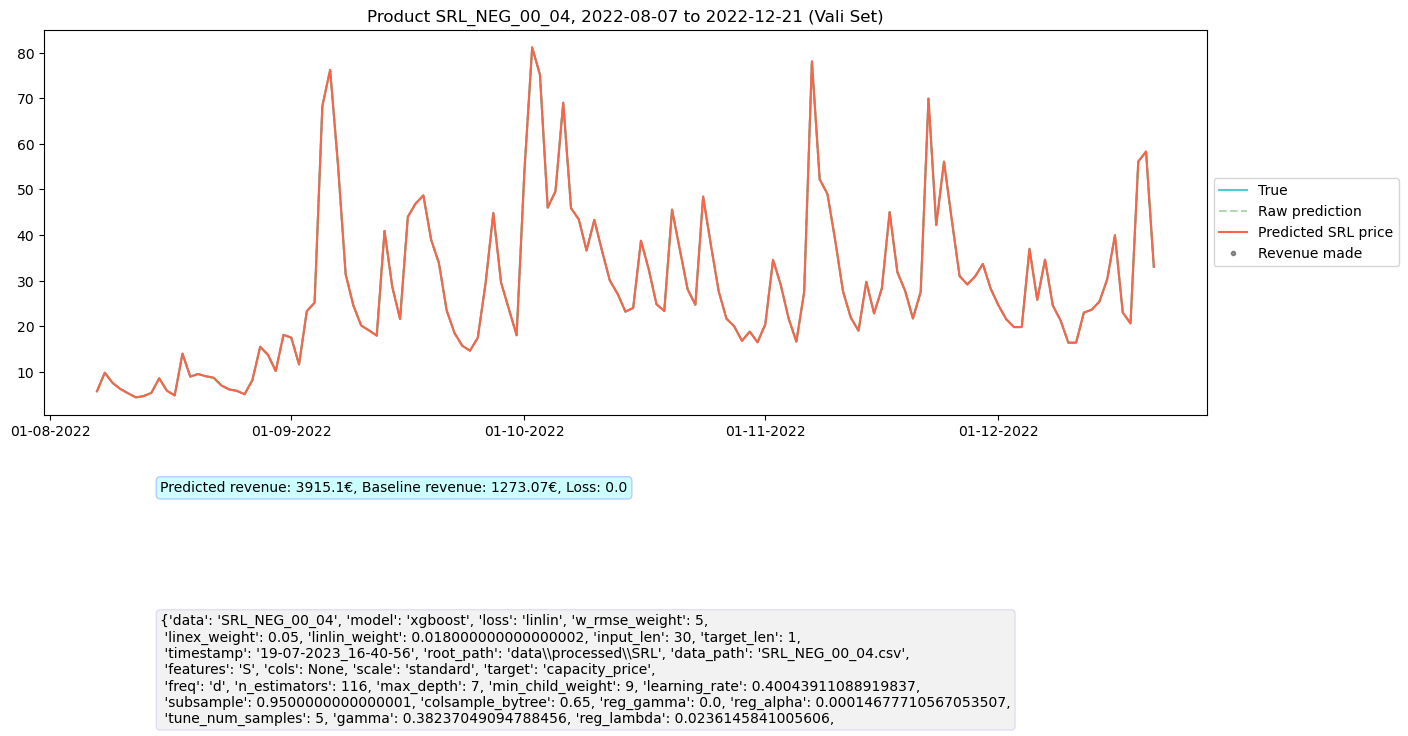

In [5]:
result.plot_pred_vs_true(result.true)

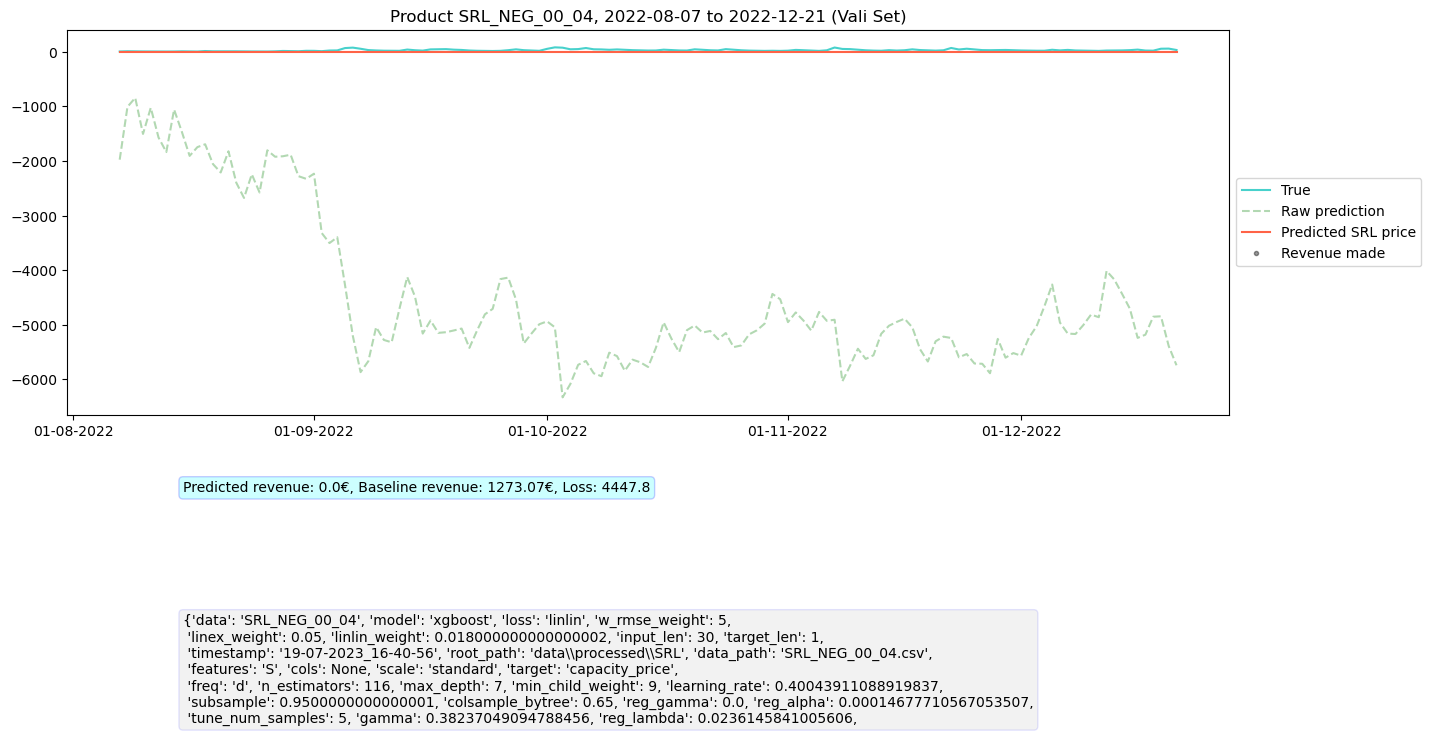

In [6]:
fig

In [8]:
s.study.best_trials

[FrozenTrial(number=48, state=TrialState.COMPLETE, values=[0.57, 249.98], datetime_start=datetime.datetime(2023, 7, 19, 13, 11, 27, 835787), datetime_complete=datetime.datetime(2023, 7, 19, 13, 11, 28, 598835), params={'colsample_bytree': 0.35000000000000003, 'gamma': 0.6797959777451433, 'learning_rate': 0.050841622705409144, 'linlin_weight': 0.01, 'max_depth': 4, 'min_child_weight': 6, 'n_estimators': 147, 'reg_alpha': 0.00016755647619331193, 'reg_lambda': 5.938139304921485e-05, 'subsample': 0.65}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'colsample_bytree': FloatDistribution(high=1.0, log=False, low=0.2, step=0.05), 'gamma': FloatDistribution(high=1.0, log=False, low=0.0, step=None), 'learning_rate': FloatDistribution(high=0.5, log=False, low=0.05, step=None), 'linlin_weight': FloatDistribution(high=0.25, log=False, low=0.01, step=0.001), 'max_depth': IntDistribution(high=12, log=False, low=3, step=1), 'min_child_weight': IntDistribution(high=15, log=Fal